# Day 2 with Skimage: numpy arrays and visualisation

Source of inspiration and work today Image Analysis in Python with SciPy and scikit-image | SciPy 2018 Tutorial | Stefan van der Walt: https://www.youtube.com/watch?v=pZATswy_IsQ

Images are represented as numpy arrays in scikit-image. Install library:
```
! conda install -c conda-forge scikit-image -y
```

The word pixel means a picture element.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob
from skimage import io, data, img_as_float, exposure

### Challenge for fun: the skimage cat says 'HI' 

Slicing and dicing numpy arrays

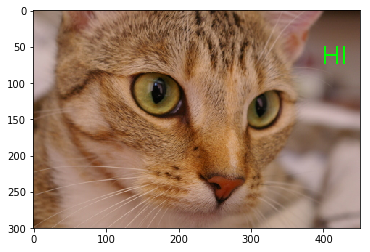

In [9]:
def draw_HI(image, coords, color=(0, 255, 0)):
    out = image.copy()
    
    H_win = out[coords[0]:coords[0] + 24, coords[1]:coords[1] + 20, :]
    H_win[:, :3] = color
    H_win[:, -3:] = color
    H_win[10:13, :] = color
    
    I_win = out[coords[0]:coords[0] + 24, coords[1]: coords[1] + 30, :]
    I_win[:, -3:] = color
    return out 

cat = data.chelsea()
cat_HI = draw_HI(cat, (50, -50))
plt.imshow(cat_HI);

### Working with the Madagascar image

In [2]:
datapath = Path('../data/')
for i in datapath.glob('*.tif'):
    print(i)

../data/B02.tif
../data/B04.tif
../data/B03.tif
../data/B08.tif
../data/madagascar.tif


In [3]:
madagascar = np.asarray(io.imread((datapath.joinpath('madagascar.tif'))))#.astype('uint8')

np.asarray used to convert imageio.core.util.Image to numpy.ndarray.

In [ ]:
# print(type(madagascar))
# print(madagascar.dtype)
# print(madagascar.shape)
# print(madagascar.min(), madagascar.max())

uint16 values go from 0 - 65535. uint8 goes from 0 - 255.

In the madagascar dataset the value only go up to 11074 - solution for successful visualisation would be to normalise using img_to_float (resulting values between 0 and 1) and equalise image using a contrast stretch. 

Source: http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html

In [4]:
# Contrast stretching between the 2nd and 98th percentile
madagascar_float = img_as_float(madagascar)
print('Normalised image: ', (madagascar_float.min(), madagascar_float.max()))
p2, p98 = np.percentile(madagascar_float, (2, 98))
madagascar_rescale = exposure.rescale_intensity(madagascar_float, in_range=(p2, p98))
print('Stretched image: ', (madagascar_rescale.min(), madagascar_rescale.max()))

Normalised image:  (0.0, 0.16897840848401618)
Stretched image:  (0.0, 1.0)


Visualising the before and after of stretching

In [8]:
# f, (ax0, ax1) = plt.subplots(1,2,figsize=(20,10))

# ax0.imshow(madagascar_float)
# ax0.set_title('original image')
# ax0.axis('off')

# ax1.imshow(madagascar_rescale)
# ax1.set_title('rescaled image')
# ax1.axis('off');

Display the red, green, blue and NIR bands from the stacked tif with skimage

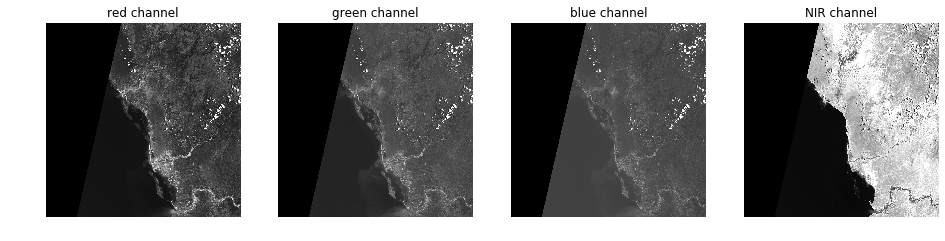

In [5]:
r = madagascar_rescale[:, :, 2]
g = madagascar_rescale[:, :, 1]
b = madagascar_rescale[:, :, 0]
n = madagascar_rescale[:, :, 3]

f, axes = plt.subplots(1, 4, figsize=(16, 5))

for ax in axes:
    ax.axis('off')
    
(ax_r, ax_g, ax_b, ax_n) = axes

ax_r.imshow(r, cmap='gray')
ax_r.set_title('red channel')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green channel')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue channel')

ax_n.imshow(n, cmap='gray')
ax_n.set_title('NIR channel');

Display a true colour and a false colour image

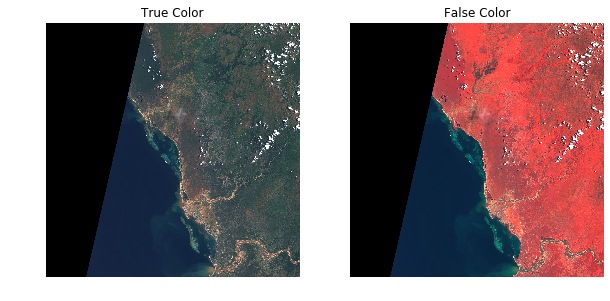

In [6]:
f, axes = plt.subplots(1, 2, figsize=(10,10))
for ax in axes:
    ax.axis('off')
(ax_color, ax_false) = axes
ax_color.imshow(np.stack([r,g,b], axis=2))
ax_color.set_title('True Color')
ax_false.imshow(np.stack([n,g,b], axis=2))
ax_false.set_title('False Color');